In [7]:
#https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6

import pandas as pd
import numpy as np
import os

import cv2

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential, Model

import random

C:\Users\sahil\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sahil\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sahil\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sahil\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\f

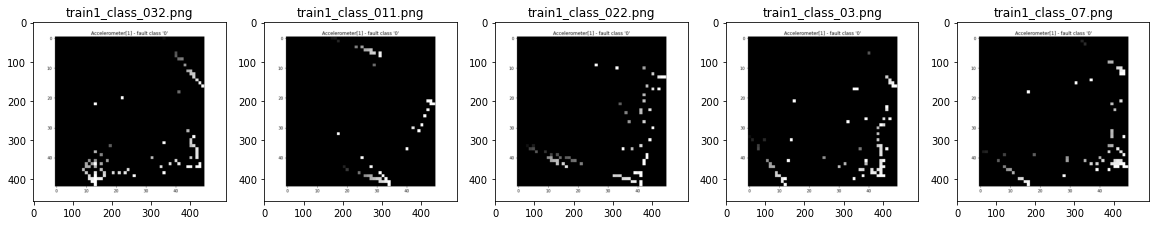

In [8]:
IMG_WIDTH=200
IMG_HEIGHT=200

plt.figure(figsize=(20,20))
img_folder=r'C:\Users\sahil\Python Bootcamp\Images final IMS\ALGORITHM_DATASET_IMAGES\sensor_y'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [9]:
img_folder=r'C:\Users\sahil\Python Bootcamp\Images final IMS\ALGORITHM_DATASET_IMAGES'

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'C:\Users\sahil\Python Bootcamp\Images final IMS\ALGORITHM_DATASET_IMAGES')

In [10]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [11]:
model = keras.Sequential([
  keras.layers.Flatten(),
  #keras.layers.Dropout(0.2),
  keras.layers.Dense(512, activation='relu'),
  #keras.layers.Dropout(0.2),
  keras.layers.Dense(256, activation='relu'),
  #keras.layers.Dropout(0.5),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


#history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)
model.fit(np.array(img_data), np.array(list(map(int,target_val))), epochs=5, batch_size=4)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/5
102/102 [==============================] - 8s 82ms/sample - loss: 39.4074 - acc: 0.3725
Epoch 2/5
102/102 [==============================] - 8s 83ms/sample - loss: 6.6747 - acc: 0.3922
Epoch 3/5
102/102 [==============================] - 8s 83ms/sample - loss: 1.3744 - acc: 0.5098
Epoch 4/5
102/102 [==============================] - 9s 85ms/sample - loss: 1.4560 - acc: 0.5686
Epoch 5/5
102/102 [==============================] - 9s 85ms/sample - loss: 1.0155 - acc: 0.5686


In [ ]:
model.save(r'C:\Users\sahil\Python Bootcamp\Images final IMS\working93percentmodel.h5')

In [ ]:
model = keras.models.load_model(r'C:\Users\sahil\Python Bootcamp\Images final IMS\working93percentmodel.h5')

# Real time Program

In [1]:
import serial
import time
import datetime
import pandas as pd
import numpy as np
from tsfresh import extract_features
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns



In [16]:
ser.close()

Feature Extraction:   0%|          | 0/1 [00:00<?, ?it/s]

tick
    S1   S2   S3      time
0  372  372  370  0.000000
1  372  371  369  0.997066
2  371  371  369  0.997066
3  370  368  367  0.997066
4  367  366  365  0.997066


Feature Extraction: 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


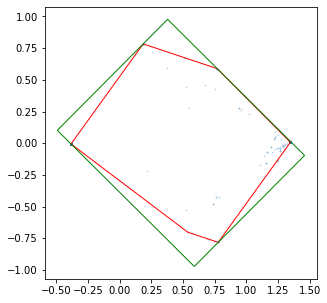

1
2
3
[[5.9511505e-05 9.1818660e-02 9.0812182e-01]]
[[1.4650030e-04 1.3526246e-01 8.6459100e-01]]
[[9.0985966e-05 1.2494219e-01 8.7496686e-01]]
3
tick


Feature Extraction:   0%|          | 0/1 [00:00<?, ?it/s]

    S1   S2   S3        time
0  403  405  412    0.000000
1  401  400  401  102.224827
2  396  395  395  200.328827
3  391  391  390  302.721977
4  387  387  386  404.679060


Feature Extraction: 100%|██████████| 1/1 [00:03<00:00,  3.74s/it]


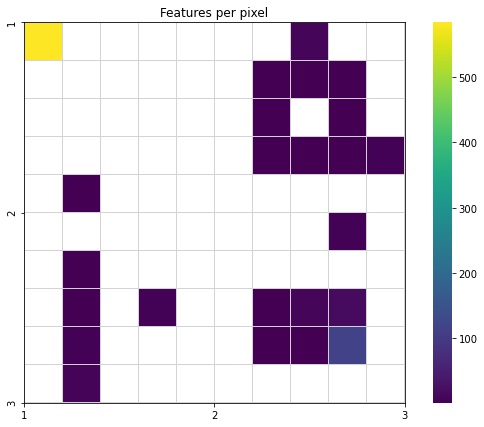

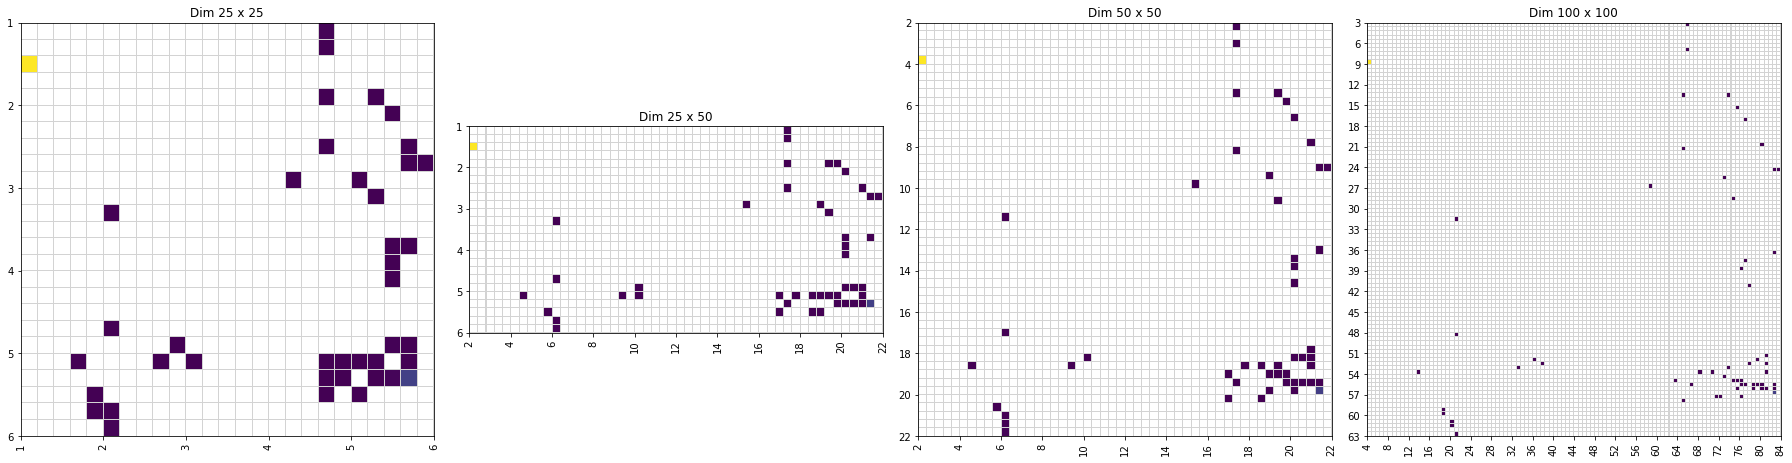

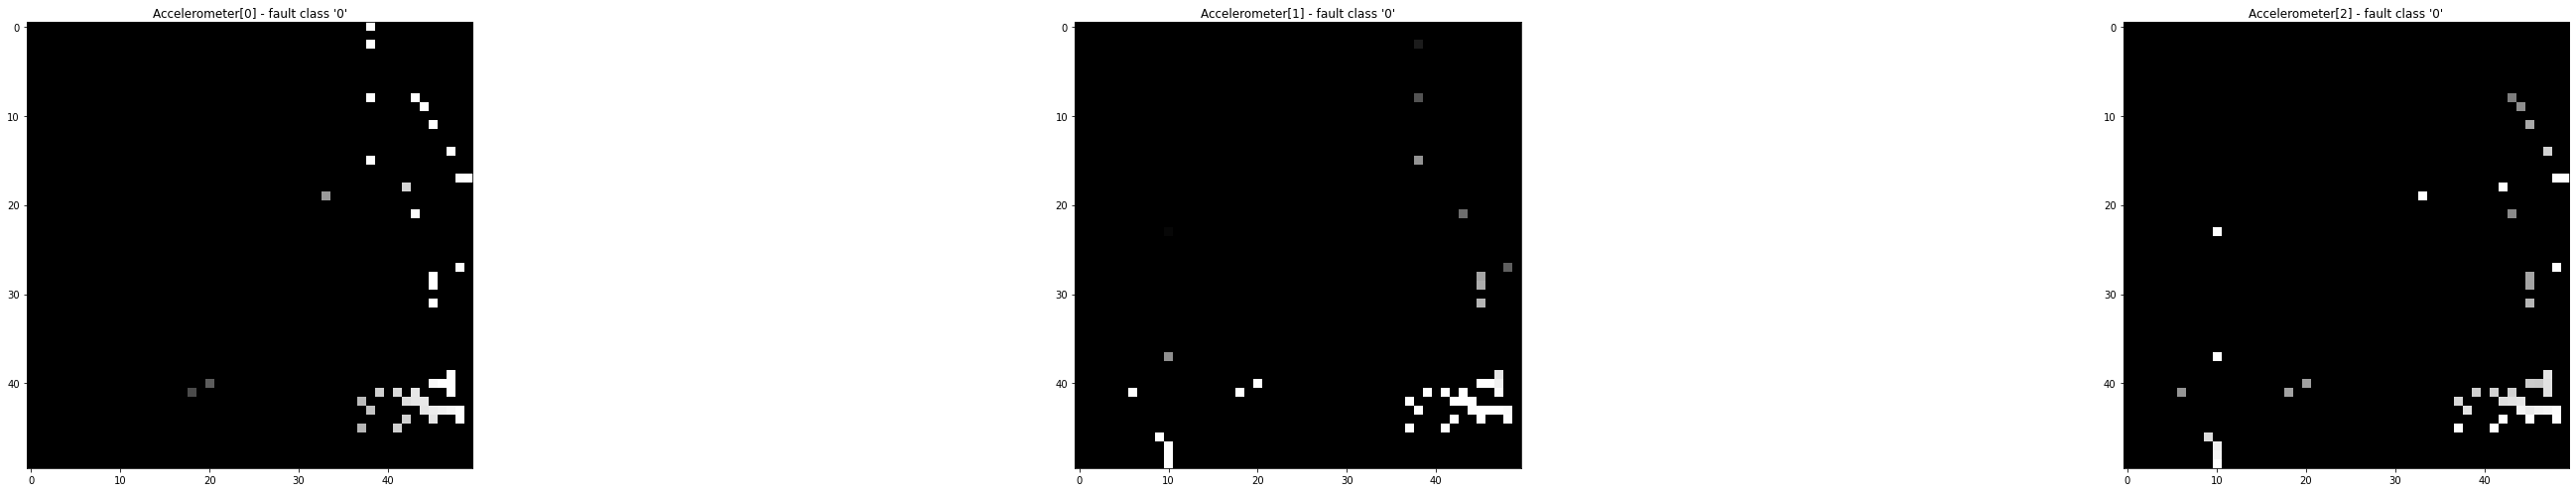

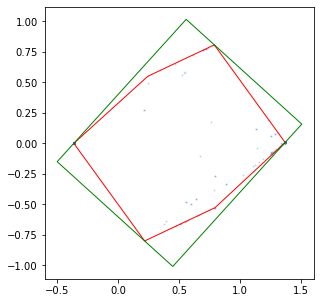

1
2
3
[[5.7703757e-05 8.1246279e-02 9.1869605e-01]]
[[5.0313261e-06 3.2481033e-02 9.6751392e-01]]
[[6.9171897e-06 3.2242034e-02 9.6775103e-01]]
3


Feature Extraction:   0%|          | 0/1 [00:00<?, ?it/s]

tick
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There was error here!
There

Feature Extraction: 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]


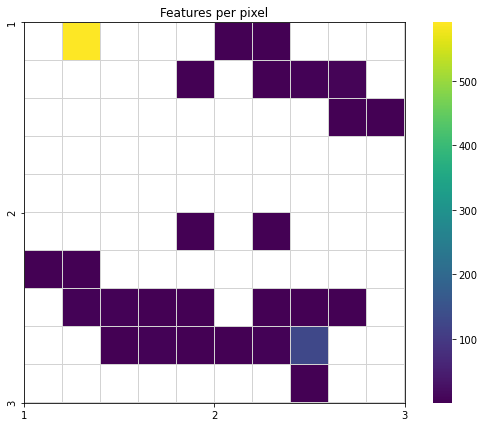

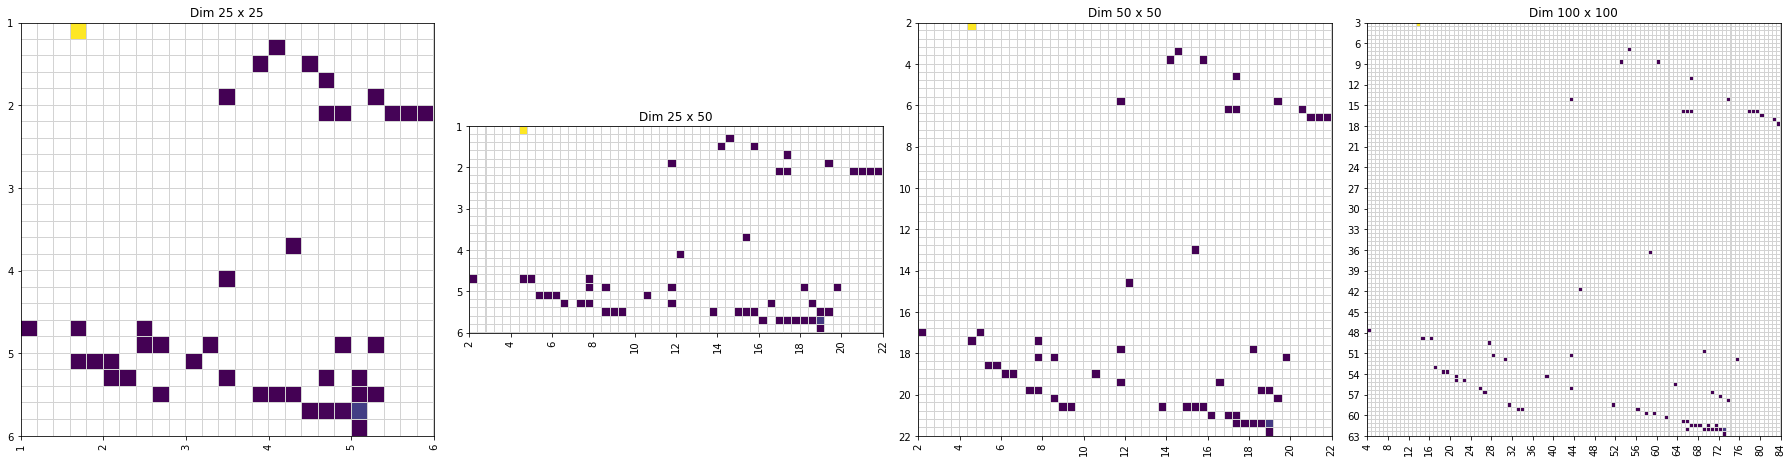

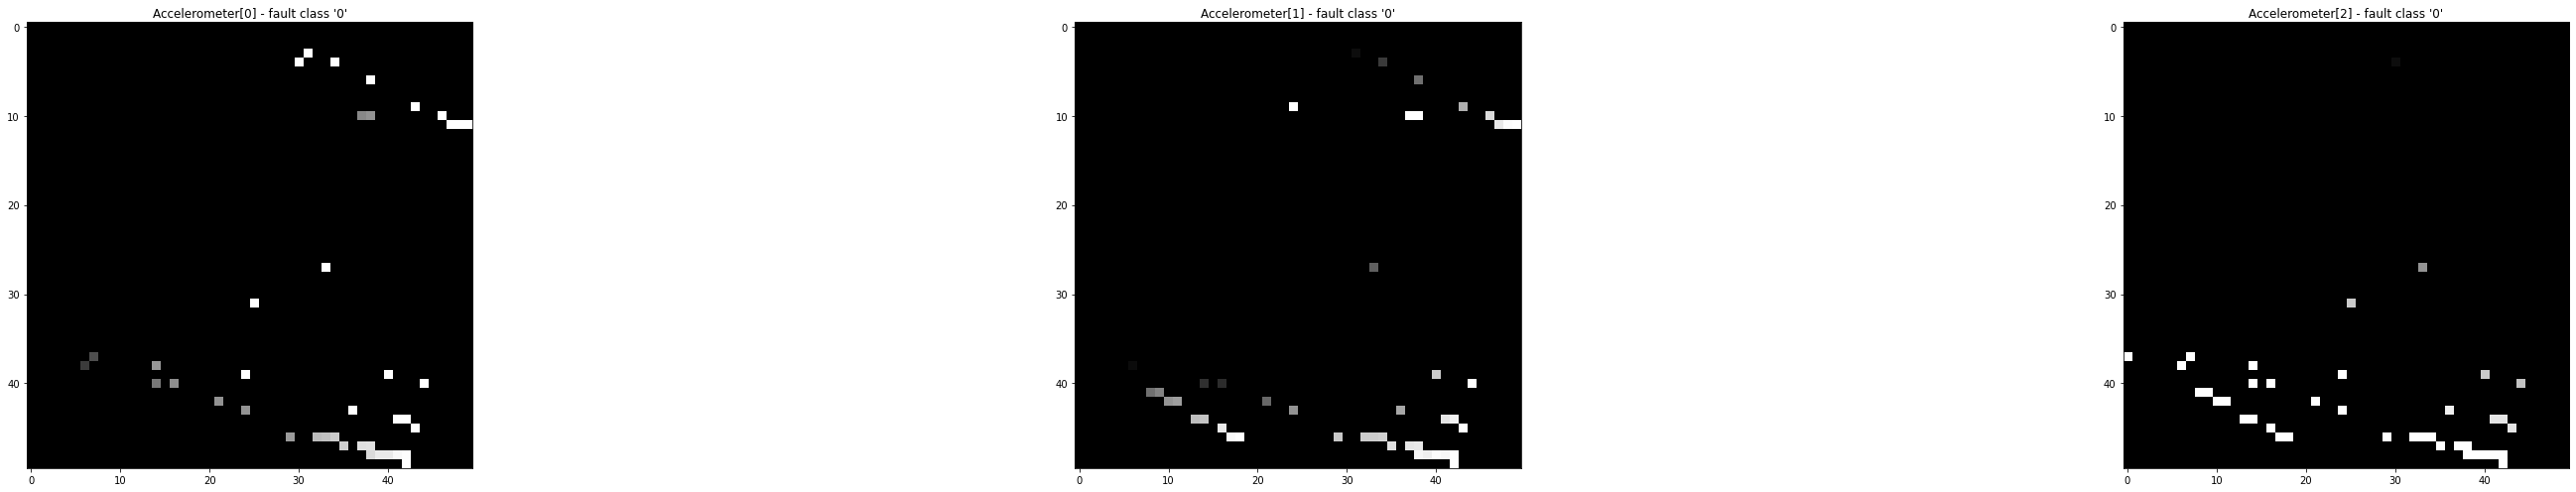

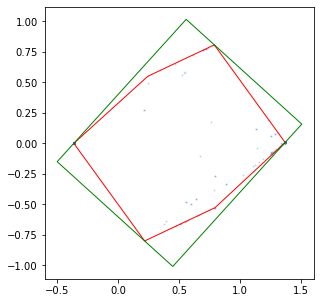

1
2
3
[[5.7703757e-05 8.1246279e-02 9.1869605e-01]]
[[5.0313261e-06 3.2481033e-02 9.6751392e-01]]
[[6.9171897e-06 3.2242034e-02 9.6775103e-01]]
3
tick


Feature Extraction:   0%|          | 0/1 [00:00<?, ?it/s]

    S1   S2   S3        time
0  400  404  411    0.000000
1  405  403  403  109.368086
2  406  403  401  203.109980
3  406  403  399  297.127962
4  405  403  399  406.514883


Feature Extraction: 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]


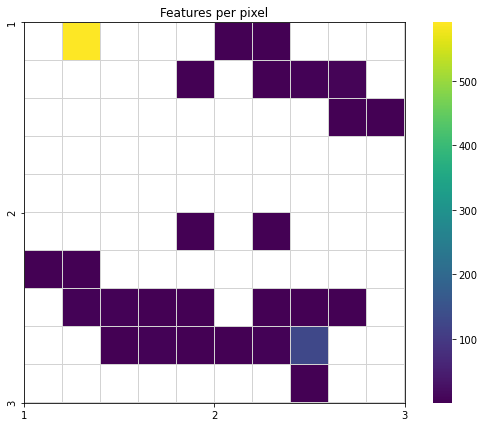

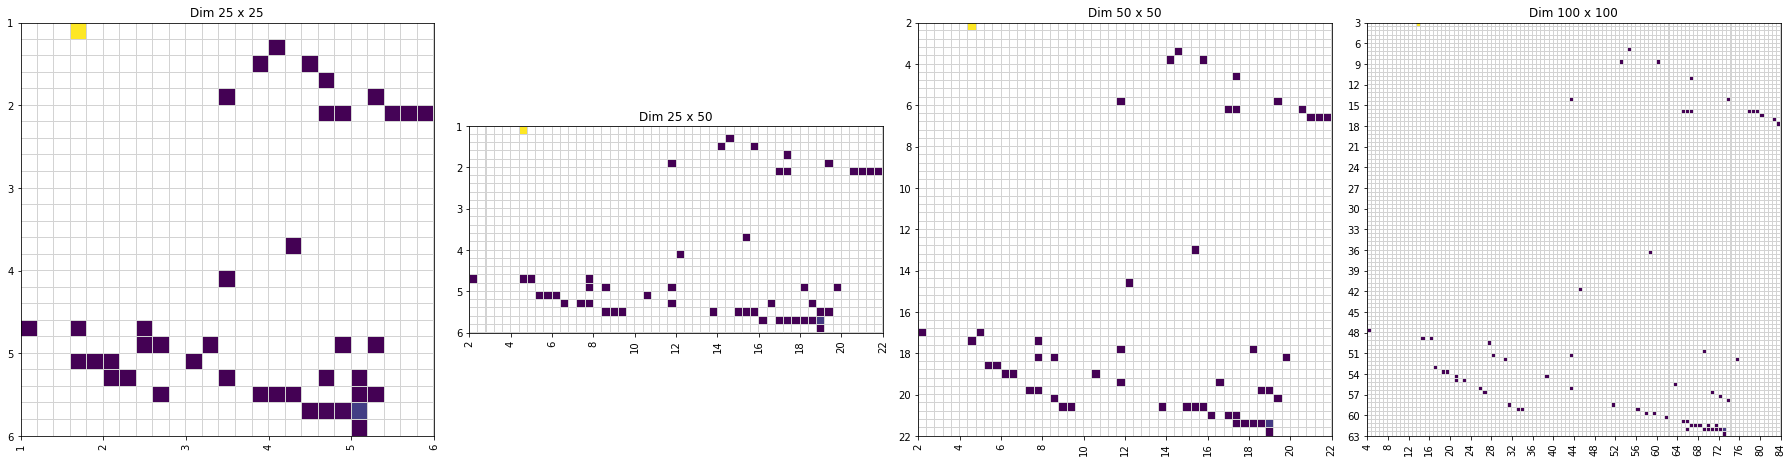

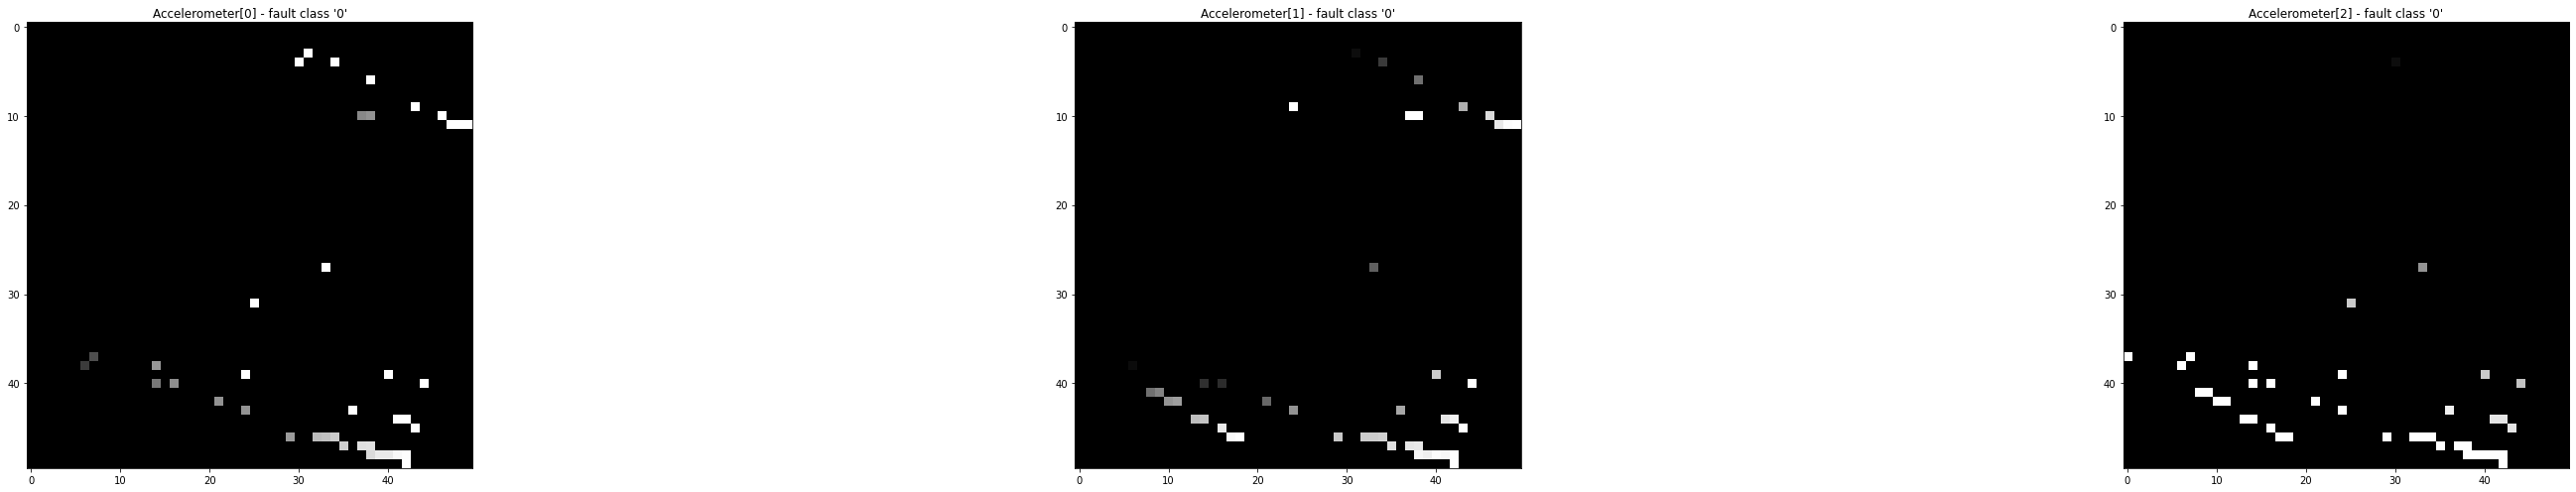

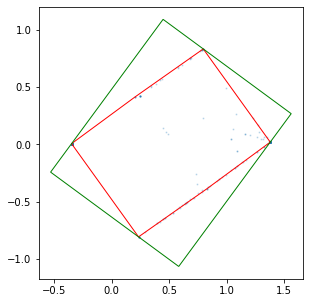

1
2
3
[[6.276533e-05 8.066368e-02 9.192735e-01]]
[[6.9842354e-05 9.0680465e-02 9.0924972e-01]]
[[3.6910587e-05 6.4844914e-02 9.3511820e-01]]
3
tick


Feature Extraction:   0%|          | 0/1 [00:00<?, ?it/s]

    S1   S2   S3        time
0  354  372  392    0.000000
1  657  560  502   93.787909
2  651  605  561  203.111887
3  682  642  607  296.875954
4  652  638  620  406.244993


Feature Extraction: 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]


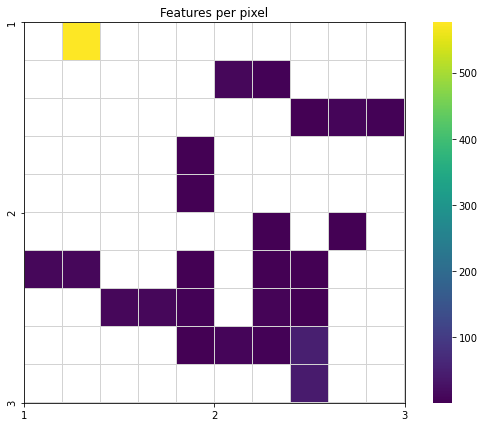

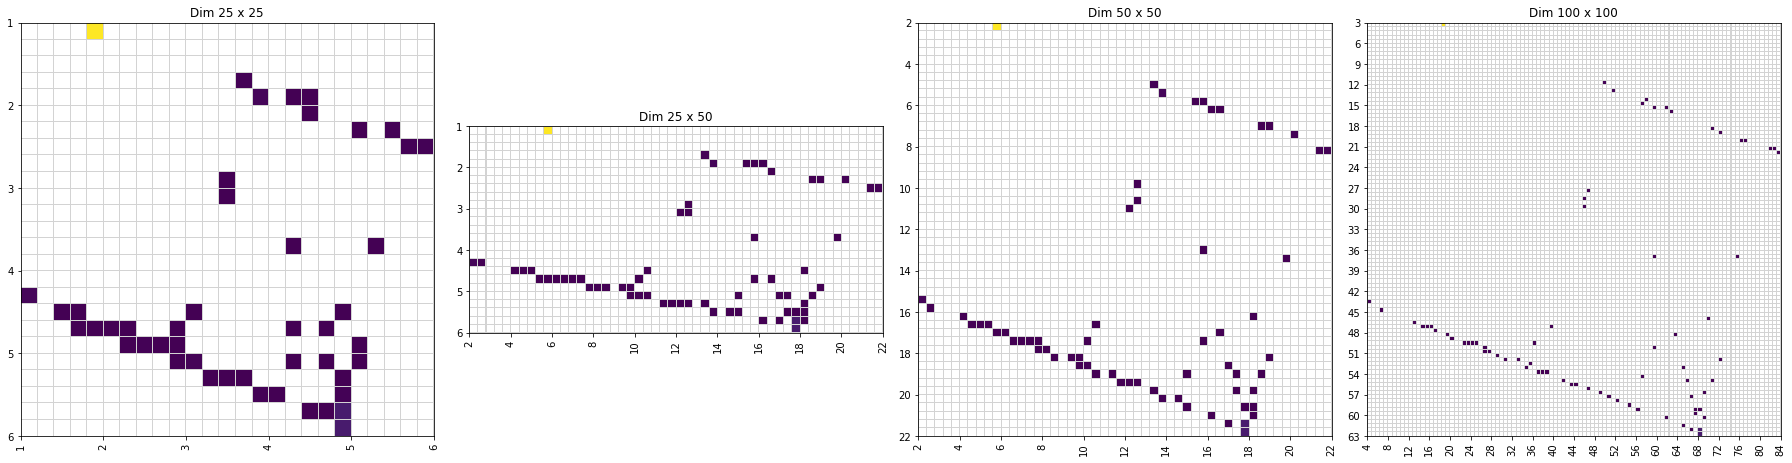

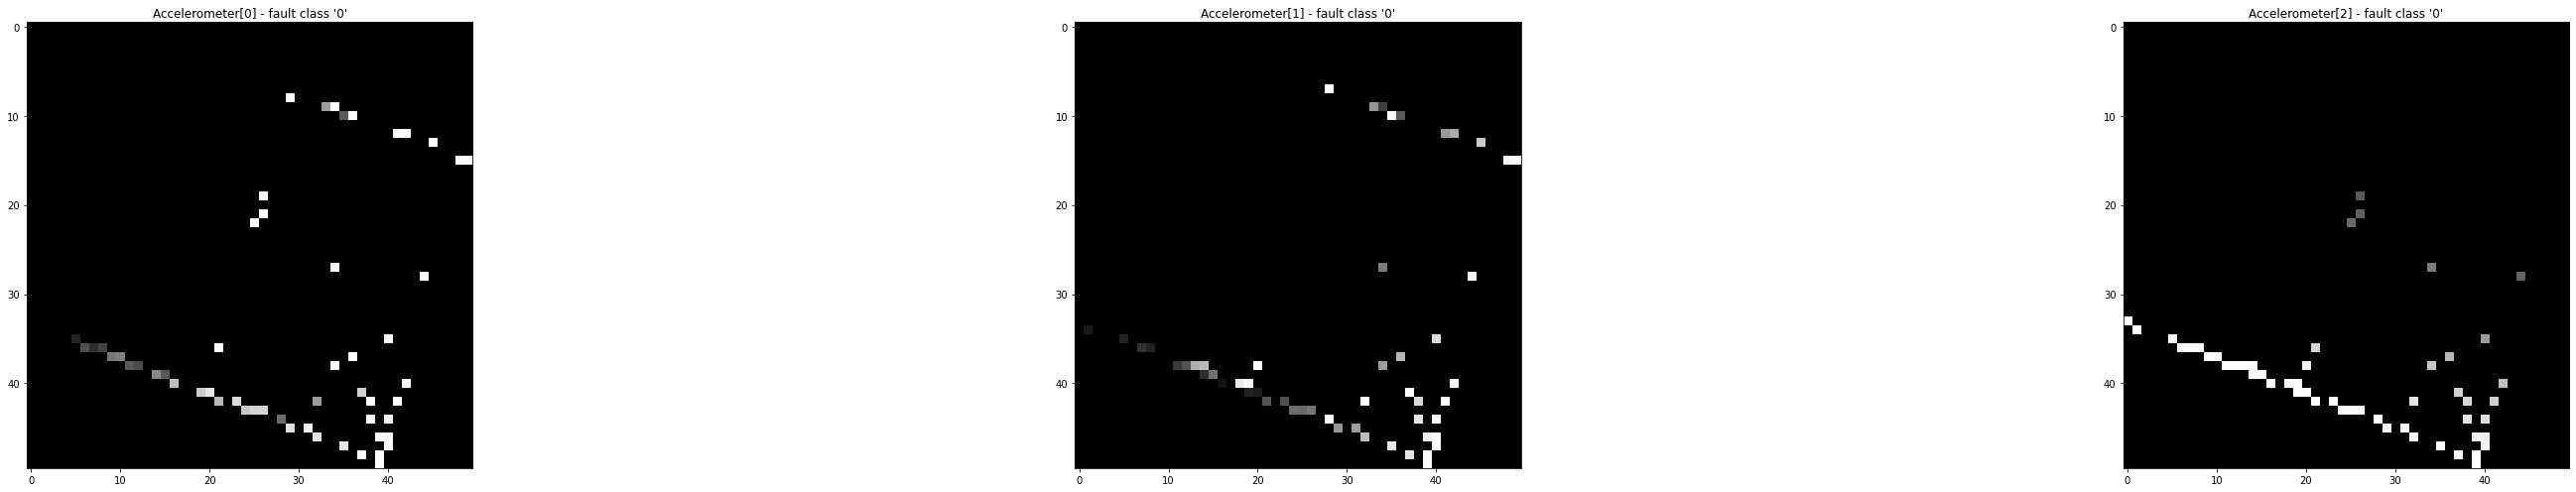

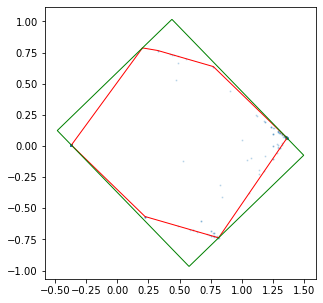

1
2
3
[[0.00094546 0.19976594 0.7992886 ]]
[[3.6908099e-05 1.1525559e-01 8.8470751e-01]]
[[2.5755651e-05 8.9408338e-02 9.1056585e-01]]
3
tick


Feature Extraction:   0%|          | 0/1 [00:00<?, ?it/s]

    S1   S2   S3        time
0  338  366  386    0.000000
1  338  349  361  103.284121
2  338  344  349  201.637030
3  338  342  344  303.997993
4  338  341  342  406.400919


Feature Extraction:   0%|          | 0/1 [00:03<?, ?it/s]


KeyboardInterrupt: 

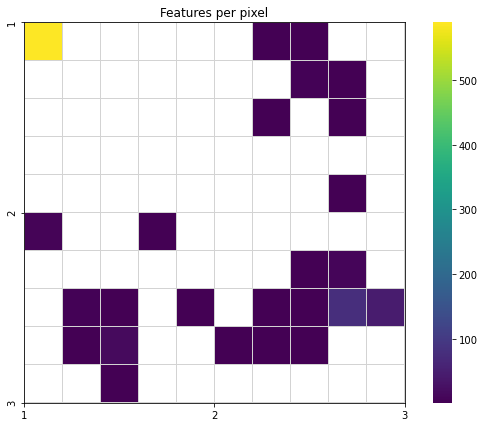

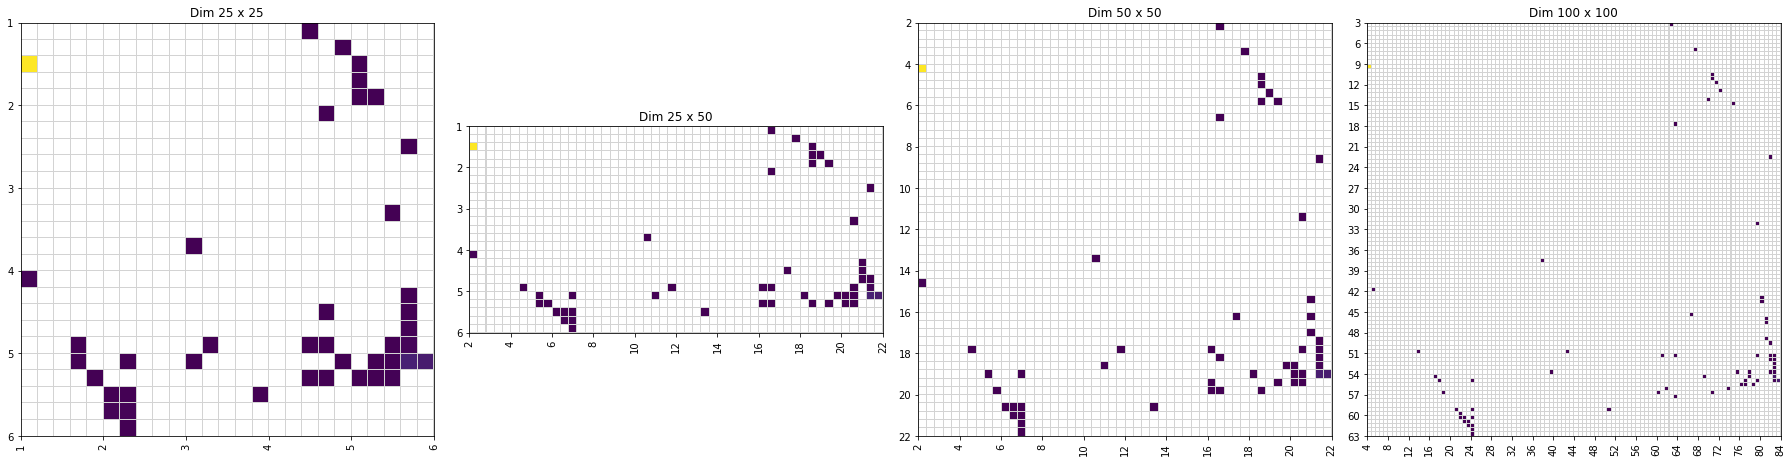

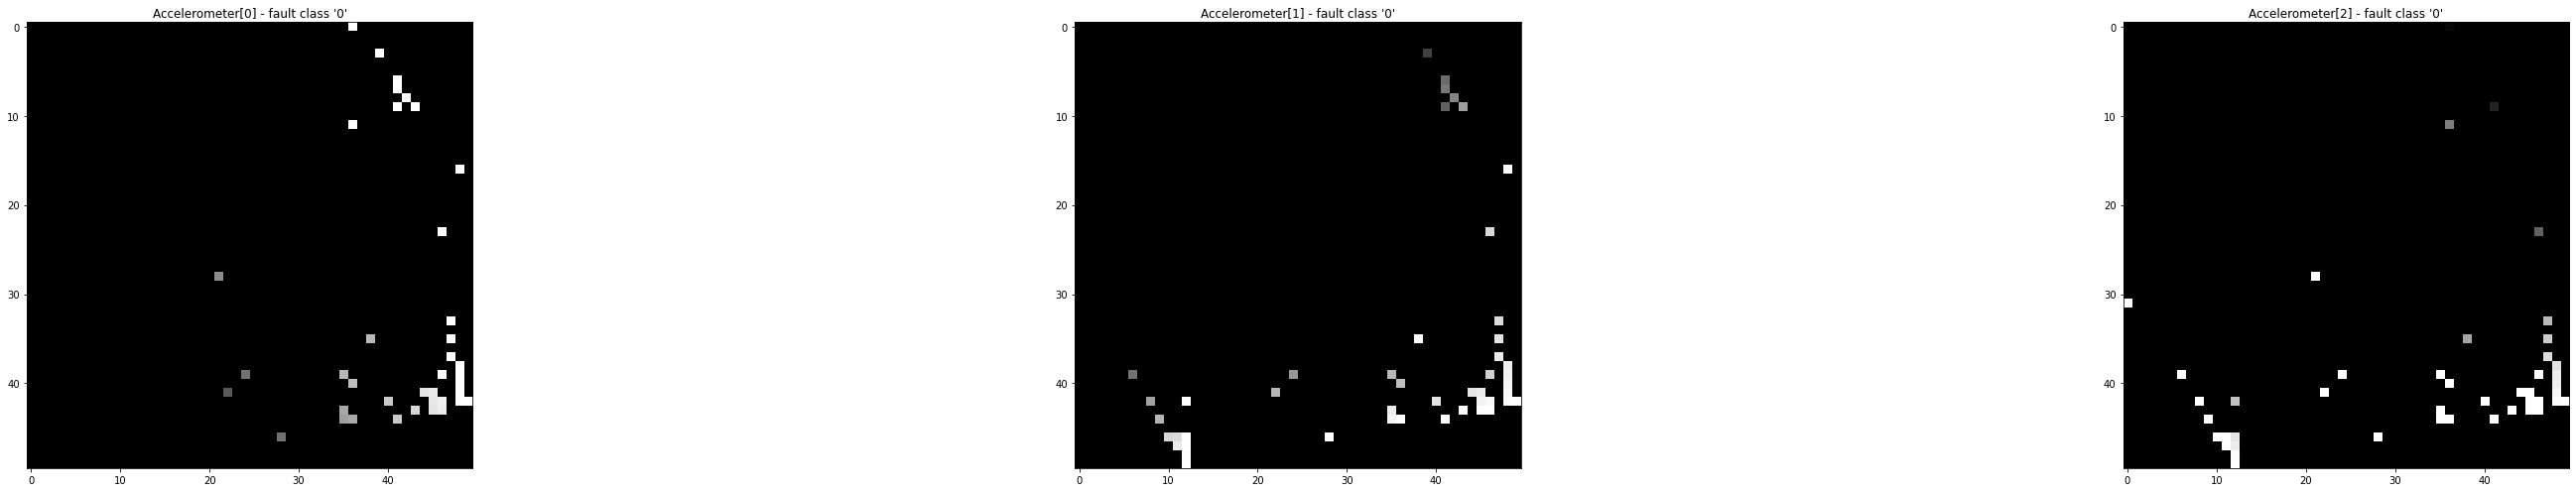

In [17]:
count=0
starttime = time.time()
#///////////////////////////////////////////////////////////////////////////////////////////////////// 
while True:
    print ("tick")
    ser = serial.Serial(port='COM3', baudrate=9600)
    data=[]
    times=[]
        #print("connected to: " + ser.portstr)
    i=0
    tries=0
    while tries<50:    
        try:
            while i<5:
                line = ser.readline()
                string_n = line.decode()  # decode byte string into Unicode  
                string = string_n.rstrip() # remove \n and \r
                #flt = float(string)        # convert string to float
                timestamp = datetime.datetime.now()
                #timestamp = str(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S'))

                data.append(string.split('\t'))
                times.append(float(timestamp.timestamp()))
                i=i+1
            nparr=np.array(data)
            df=pd.DataFrame(list(zip(nparr[:,0],nparr[:,1],nparr[:,2])), columns =['S1', 'S2', 'S3'])
            break
        except IndexError:
            ser.close()
            print('There was error here!')
            
            tries+=1
            
    ser.close()
    times = [(x - min(times))*1000 for x in times]                 #In miliseconds
    df['time']=times
    print(df)
    df = df.astype('float64')
    
    
   # //////////////////////////////////////////////////////////////////////////////////////////////
    
    df['id']=pd.DataFrame(np.ones((5,), dtype=int))
    df['time']=times
    finalLIST_healthy=[]
    for column in df.columns[0:3]: 

            temp_df= df[[column, 'id', 'time']]
            #print(temp_df)
            extracted_features = extract_features(temp_df, column_id="id", column_sort="time")
            #print(extracted_features)
            finalLIST_healthy.append(extracted_features.values.tolist())

            #print(finalLIST_healthy)
            temp_df=pd.DataFrame()
            extracted_features=pd.DataFrame()
    extracted_df = pd.DataFrame(list(zip(finalLIST_healthy[0][0], finalLIST_healthy[1][0], 
                                   finalLIST_healthy[2][0])))
    final_extrcated_Transposed=extracted_df.T
    final_extrcated_Transposed


    X= final_extrcated_Transposed
    y_train=pd.DataFrame([0,0,0])
    y_train.columns=['Labels']



    ln = LogScaler()
    X_train_norm = ln.fit_transform(X)

    X_train_norm= X_train_norm.fillna(0)


    it = ImageTransformer(feature_extractor='pca', 
                          pixels=10, random_state=1701, 
                          n_jobs=-1)
    plt.figure(figsize=(50, 5))
    _ = it.fit(X_train_norm, plot=True)

    print('1')
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan

    plt.figure(figsize=(10, 7))

    ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                     linecolor="lightgrey", square=True)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    for _, spine in ax.spines.items():
        spine.set_visible(True)
    _ = plt.title("Features per pixel")

    print('2')
    
    
    
    
    
    
    px_sizes = [25, (25, 50), 50, 100]

    fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
    for ix, px in enumerate(px_sizes):
        it.pixels = px
        fdm = it.feature_density_matrix()
        fdm[fdm == 0] = np.nan
        cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                          linecolor="lightgrey", square=True, 
                          ax=ax[ix], cbar=False)
        cax.set_title('Dim {} x {}'.format(*it.pixels))
        for _, spine in cax.spines.items():
            spine.set_visible(True)
        cax.xaxis.set_major_locator(ticker.MultipleLocator(5))
        cax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.tight_layout()    

    it.pixels = 50
    
    
    
    
    
    


    X_train_img = it.transform(X_train_norm)
    print('3')
    fig, ax = plt.subplots(1, 3, figsize=(50, 7))
    for i in range(0,3):
        ax[i].imshow(X_train_img[i], cmap='Purples')
        ax[i].title.set_text("Accelerometer[{}] - fault class '{}'".format(i, y_train.iloc[i,0]))
        extent = ax[i].get_window_extent().transformed(fig.dpi_scale_trans.inverted())

        fig.savefig(fr'C:\Users\sahil\Python Bootcamp\Images final IMS\oldschoolwithtrainedmodel\train{i}_class_00.png', 
                    bbox_inches=extent.expanded(0.6, 1.2))
    plt.tight_layout()
    #FOR X_AXIS SENSOR:
    imagex= cv2.imread(r'C:\Users\sahil\Python Bootcamp\Images final IMS\oldschoolwithtrainedmodel\train0_class_00.png')
    imagex=cv2.resize(imagex, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    imagex=np.array(imagex)
    imagex = imagex.astype('float32')
    imagex /= 255
    imagex = np.expand_dims(imagex, axis = 0)
    print(model.predict(imagex))
    #FOR Y_AXIS SENSOR:
    imagey= cv2.imread(r'C:\Users\sahil\Python Bootcamp\Images final IMS\oldschoolwithtrainedmodel\train1_class_00.png')
    imagey=cv2.resize(imagey, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    imagey=np.array(imagey)
    imagey = imagey.astype('float32')
    imagey /= 255
    imagey = np.expand_dims(imagey, axis = 0)
    print(model.predict(imagey))
    
    #FOR Z_AXIS SENSOR:
    imagez= cv2.imread(r'C:\Users\sahil\Python Bootcamp\Images final IMS\oldschoolwithtrainedmodel\train2_class_00.png')
    imagez=cv2.resize(imagez, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    imagez=np.array(imagez)
    imagez = imagez.astype('float32')
    imagez /= 255
    imagez = np.expand_dims(imagez, axis = 0)
    print(model.predict(imagez))
    

    print('3')
    count+=1
    time.sleep(25.0 - ((time.time() - starttime) % 25.0))
       

In [ ]:
nparr.shape

In [3]:
df

NameError: name 'df' is not defined

# Predictions

In [ ]:
image= cv2.imread(r'C:\Users\sahil\Python Bootcamp\Images final IMS\ALGORITHM_DATASET_IMAGES\sensor_z\train2_class_05.png')
image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
image=np.array(image)
image = image.astype('float32')
image /= 255
image = np.expand_dims(image, axis = 0)

In [ ]:
model.predict(image)

In [ ]:
from PIL import Image, ImageTk

ser = serial.Serial(
    port='COM3',
    baudrate=9600)
data=[]
time=[]
print("connected to: " + ser.portstr)
i=0
while i<50:
    line = ser.readline()
    string_n = line.decode()  # decode byte string into Unicode  
    string = string_n.rstrip() # remove \n and \r
    flt = float(string)        # convert string to float
    timestamp = str(datetime.datetime.now())
    #timestamp = str(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S'))
    data.append(f'{flt}')
    time.append(timestamp)

    #with open('output.txt', 'a') as pyfile:
        #pyfile.write(f'{flt}' + ' ' + timestamp +'\n')
    i+=1

ser.close()

df = pd.DataFrame(list(zip(time, data)),
               columns =['time', 'data'])

In [ ]:
 #     #Applying DEEPINSIGHT
    
#     ln = LogScaler()
#     X_train_norm = ln.fit_transform(extracted_features)
#     X_train_norm=X_train_norm.fillna(0)
    
#     it = ImageTransformer(feature_extractor='pca', 
#                           pixels=10, random_state=1701, 
#                           n_jobs=-1)
#     #plt.figure(figsize=(50, 5))
#     #_ = it.fit(X_train_norm, plot=True)
#     X_train_img = it.transform(X_train_norm)
#     fig, ax = plt.subplots(1, 2, figsize=(78, 7))
#     for i in range(0,0):
#         ax[i].imshow(X_train_img[i])
#         #ax[i].title.set_text("Accelerometer[{}] - fault class '{}'".format(i, y_train.iloc[i,0]))
#         #extent = ax[i].get_window_extent().transformed(fig.dpi_scale_trans.inverted())

#         #fig.savefig(fr'C:\Users\sahil\Python Bootcamp\Images final IMS\train{i}_class_{y_train.iloc[i,0]}.png', 
#                     #bbox_inches=extent.expanded(1.2, 0.8))
#     plt.tight_layout()

In [ ]:
extracted_features

In [ ]:
import time
starttime = time.time()
while True:
    print ("tick")
    time.sleep(30.0 - ((time.time() - starttime) % 30.0))